## ITS307 Data Analytics : Spring Semester 2022

## Mini Project


## Group 15
1. Gyeltshen Wangchuk (12190052)
2. Karma Choden (12190056)
3. Kuenga Tenzin Tshering (12190063)
4. Saraswati Acharja (12190075)
5. Tshering Dorji (12190092)


# Table of Contents 
<ol start="0">
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Scaling</li>
<li> Encoding categorical variables</li>
<li> Feature Selection</li>
<li> Model Training</li>
<li> Conclusion</li>
</ol>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

## Loading and Cleaning with Pandas

In [2]:
df =pd.read_excel("data.xlsx")
df.head()

From                To    km  fuel_price  fuel_consumption  taxi_fare
0  Nganglam  Marung ( mining)  13.0       92.01              1.04       96.0
1  Nganglam            Kerung  16.0       92.01              1.28      118.0
2  Nganglam      Chhokhorling  21.0       92.01              1.68      155.0
3  Nganglam        Dechheling  23.0       92.01              1.84      169.0
4  Nganglam         Norbugang  25.0       92.01              2.00      184.0

In [3]:
df.tail()

From                        To    km  fuel_price  \
529      Damphu Town                 Dhupidara  10.0       92.01   
530      Damphu Town                 Changchey  12.0       92.01   
531      Damphu Town                  Lamidara  18.0       92.01   
532      Damphu Town                   Sunkosh  20.0       92.01   
533  Gedu Zero Point  Laptshakha Town (RSTA OF   1.0       92.01   

     fuel_consumption  taxi_fare  
529              0.80    73.6080  
530              0.96    88.3296  
531              1.44   132.4944  
532              1.60   147.2160  
533              0.08     7.3608

In [4]:
df.dtypes

From                 object
To                   object
km                  float64
fuel_price          float64
fuel_consumption    float64
taxi_fare           float64
dtype: object

In [5]:
df['km'] = df['km'].astype(int)
df['taxi_fare'] = df['taxi_fare'].astype(int)

df.dtypes

From                 object
To                   object
km                    int32
fuel_price          float64
fuel_consumption    float64
taxi_fare             int32
dtype: object

In [6]:
df.shape

(534, 6)

In [7]:
df.isnull().sum()

From                0
To                  0
km                  0
fuel_price          0
fuel_consumption    0
taxi_fare           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   From              534 non-null    object 
 1   To                534 non-null    object 
 2   km                534 non-null    int32  
 3   fuel_price        534 non-null    float64
 4   fuel_consumption  534 non-null    float64
 5   taxi_fare         534 non-null    int32  
dtypes: float64(2), int32(2), object(2)
memory usage: 21.0+ KB


In [9]:
df.describe()

km    fuel_price  fuel_consumption    taxi_fare
count  534.000000  5.340000e+02        534.000000   534.000000
mean    18.116105  9.201000e+01          1.453408   133.035581
std     23.621261  2.133627e-13          1.893462   173.845721
min      0.000000  9.201000e+01          0.000000     0.000000
25%      4.000000  9.201000e+01          0.320000    29.000000
50%      9.000000  9.201000e+01          0.720000    66.000000
75%     20.000000  9.201000e+01          1.600000   147.000000
max    140.000000  9.201000e+01         11.200000  1030.000000

## EDA

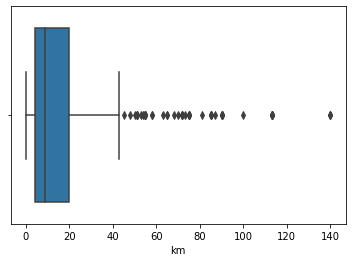

In [10]:
sns.boxplot(x=df['km'])
plt.show()

In [11]:
 # calculating IQR and upper limit and lower limit to find outliers
Q1 = df.km.quantile(0.25)
Q3 = df.km.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [12]:
#Checking the outliers
df[(df.km < lowerlimit)  | (df.km > upperlimit)]

From                       To   km  fuel_price  \
7                       Nganglam                  Panbang   55       92.01   
35                       Wangdue                   Lawala   54       92.01   
36                       Wangdue              Ganteygompa   58       92.01   
37                       Wangdue                Phobjikha   68       92.01   
54   Phuntsholing (Taxi Parking)                     Gedu   48       92.01   
123                     Zhemgang                  Panbang  113       92.01   
129                     Zhemgang                   Goling   51       92.01   
130                     Zhemgang                     Buli   55       92.01   
131                     Zhemgang                  Parling   72       92.01   
132                     Zhemgang                   Gomphu   75       92.01   
133                     Zhemgang                  Rendibi   85       92.01   
134                     Zhemgang                  Pantang   90       92.01   
283                     Zhemgang                  Panbang  113       92.01   
289                     Zhemgang                   Goling   51       92.01   
290                     Zhemgang                     Buli   55       92.01   
291                     Zhemgang                  Parling   72       92.01   
292                     Zhemgang                   Gomphu   75       92.01   
293                     Zhemgang                  Rendibi   85       92.01   
294                     Zhemgang                  Pantang   90       92.01   
295                     Zhemgang                 Pangbang  113       92.01   
296                     Zhemgang                   Bjokha  140       92.01   
297                     Zhemgang                  Panbang  113       92.01   
303                     Zhemgang                   Goling   51       92.01   
304                     Zhemgang                     Buli   55       92.01   
305                     Zhemgang                  Parling   72       92.01   
306                     Zhemgang                   Gomphu   75       92.01   
307                     Zhemgang                  Rendibi   85       92.01   
308                     Zhemgang                  Pantang   90       92.01   
309                     Zhemgang                 Pangbang  113       92.01   
310                     Zhemgang                   Bjokha  140       92.01   
311                     Zhemgang                  Panbang  113       92.01   
317                     Zhemgang                   Goling   51       92.01   
318                     Zhemgang                     Buli   55       92.01   
319                     Zhemgang                  Parling   72       92.01   
320                     Zhemgang                   Gomphu   75       92.01   
321                     Zhemgang                  Rendibi   85       92.01   
322                     Zhemgang                  Pantang   90       92.01   
323                     Zhemgang                 Pangbang  113       92.01   
324                     Zhemgang                   Bjokha  140       92.01   
356          Mongar Taxi parking                 Yongkola   50       92.01   
357          Mongar Taxi parking    Drepong(Gewog Centre)   53       92.01   
358          Mongar Taxi parking    Chaskar(Gewog Centre)   55       92.01   
359          Mongar Taxi parking   Sershong(Gewog Centre)   58       92.01   
360          Mongar Taxi parking      Balam(Gewog Centre)   65       92.01   
361          Mongar Taxi parking  Khengkhar(Gewog Centre)   70       92.01   
362          Mongar Taxi parking    Tsamang(Gewog Centre)   73       92.01   
363          Mongar Taxi parking   Thanrong(Gewog Centre)   75       92.01   
364          Mongar Taxi parking     Jurmey(Gewog Centre)   81       92.01   
365          Mongar Taxi parking  Drametse (Gewog Centre)   87       92.01   
366          Mongar Taxi parking   Silambee(Gewog Centre)   90       92.01   
367          Mongar Taxi parking          Dremetse

In [13]:
# Droping the rows containing height beyond lower and upper limit.
df1 = df[(df.km > lowerlimit) & (df.km < upperlimit)]
df1.shape

(479, 6)

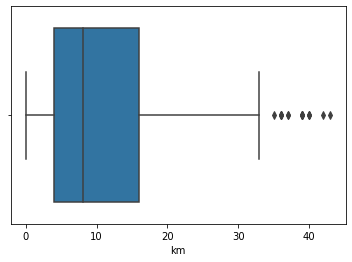

In [14]:
sns.boxplot(x=df1['km'])
plt.show()

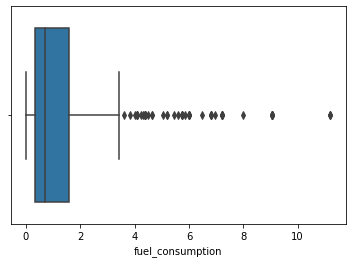

In [15]:
sns.boxplot(x=df['fuel_consumption'])
plt.show()

In [16]:
 # calculating IQR and upper limit and lower limit to find outliers
Q1 = df.fuel_consumption.quantile(0.25)
Q3 = df.fuel_consumption.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [17]:
#Checking the outliers
df[(df.fuel_consumption < lowerlimit)  | (df.fuel_consumption > upperlimit)]

From                       To   km  fuel_price  \
5                       Nganglam                 Yangbari   31       92.01   
7                       Nganglam                  Panbang   55       92.01   
35                       Wangdue                   Lawala   54       92.01   
36                       Wangdue              Ganteygompa   58       92.01   
37                       Wangdue                Phobjikha   68       92.01   
54   Phuntsholing (Taxi Parking)                     Gedu   48       92.01   
123                     Zhemgang                  Panbang  113       92.01   
129                     Zhemgang                   Goling   51       92.01   
130                     Zhemgang                     Buli   55       92.01   
131                     Zhemgang                  Parling   72       92.01   
132                     Zhemgang                   Gomphu   75       92.01   
133                     Zhemgang                  Rendibi   85       92.01   
134                     Zhemgang                  Pantang   90       92.01   
283                     Zhemgang                  Panbang  113       92.01   
289                     Zhemgang                   Goling   51       92.01   
290                     Zhemgang                     Buli   55       92.01   
291                     Zhemgang                  Parling   72       92.01   
292                     Zhemgang                   Gomphu   75       92.01   
293                     Zhemgang                  Rendibi   85       92.01   
294                     Zhemgang                  Pantang   90       92.01   
295                     Zhemgang                 Pangbang  113       92.01   
296                     Zhemgang                   Bjokha  140       92.01   
297                     Zhemgang                  Panbang  113       92.01   
303                     Zhemgang                   Goling   51       92.01   
304                     Zhemgang                     Buli   55       92.01   
305                     Zhemgang                  Parling   72       92.01   
306                     Zhemgang                   Gomphu   75       92.01   
307                     Zhemgang                  Rendibi   85       92.01   
308                     Zhemgang                  Pantang   90       92.01   
309                     Zhemgang                 Pangbang  113       92.01   
310                     Zhemgang                   Bjokha  140       92.01   
311                     Zhemgang                  Panbang  113       92.01   
317                     Zhemgang                   Goling   51       92.01   
318                     Zhemgang                     Buli   55       92.01   
319                     Zhemgang                  Parling   72       92.01   
320                     Zhemgang                   Gomphu   75       92.01   
321                     Zhemgang                  Rendibi   85       92.01   
322                     Zhemgang                  Pantang   90       92.01   
323                     Zhemgang                 Pangbang  113       92.01   
324                     Zhemgang                   Bjokha  140       92.01   
356          Mongar Taxi parking                 Yongkola   50       92.01   
357          Mongar Taxi parking    Drepong(Gewog Centre)   53       92.01   
358          Mongar Taxi parking    Chaskar(Gewog Centre)   55       92.01   
359          Mongar Taxi parking   Sershong(Gewog Centre)   58       92.01   
360          Mongar Taxi parking      Balam(Gewog Centre)   65       92.01   
361          Mongar Taxi parking  Khengkhar(Gewog Centre)   70       92.01   
362          Mongar Taxi parking    Tsamang(Gewog Centre)   73       92.01   
363          Mongar Taxi parking   Thanrong(Gewog Centre)   75       92.01   
364          Mongar Taxi parking     Jurmey(Gewog Centre)   81       92.01   
365          Mongar Taxi parking  Drametse (Gewog Centre)   87       92.01   
366          Mongar Taxi parking   Silambee(Gewog 

In [18]:
# Droping the rows containing height beyond lower and upper limit.
df1 = df[(df.fuel_consumption > lowerlimit) & (df.fuel_consumption < upperlimit)]
df1.shape

(478, 6)

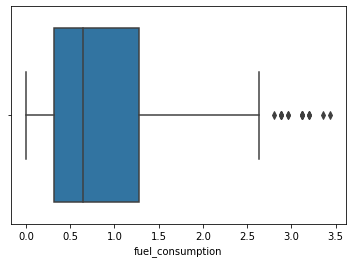

In [19]:
sns.boxplot(x=df1['fuel_consumption'])
plt.show()

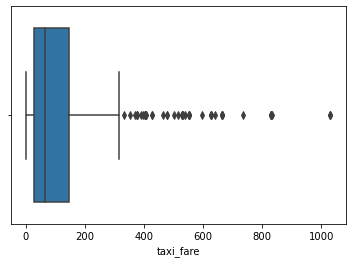

In [20]:
sns.boxplot(x=df['taxi_fare'])
plt.show()

In [21]:
 # calculating IQR and upper limit and lower limit to find outliers
Q1 = df.taxi_fare.quantile(0.25)
Q3 = df.taxi_fare.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [22]:
#Checking the outliers
df[(df.taxi_fare < lowerlimit)  | (df.taxi_fare > upperlimit)]

From                       To   km  fuel_price  \
7                       Nganglam                  Panbang   55       92.01   
35                       Wangdue                   Lawala   54       92.01   
36                       Wangdue              Ganteygompa   58       92.01   
37                       Wangdue                Phobjikha   68       92.01   
54   Phuntsholing (Taxi Parking)                     Gedu   48       92.01   
123                     Zhemgang                  Panbang  113       92.01   
129                     Zhemgang                   Goling   51       92.01   
130                     Zhemgang                     Buli   55       92.01   
131                     Zhemgang                  Parling   72       92.01   
132                     Zhemgang                   Gomphu   75       92.01   
133                     Zhemgang                  Rendibi   85       92.01   
134                     Zhemgang                  Pantang   90       92.01   
283                     Zhemgang                  Panbang  113       92.01   
289                     Zhemgang                   Goling   51       92.01   
290                     Zhemgang                     Buli   55       92.01   
291                     Zhemgang                  Parling   72       92.01   
292                     Zhemgang                   Gomphu   75       92.01   
293                     Zhemgang                  Rendibi   85       92.01   
294                     Zhemgang                  Pantang   90       92.01   
295                     Zhemgang                 Pangbang  113       92.01   
296                     Zhemgang                   Bjokha  140       92.01   
297                     Zhemgang                  Panbang  113       92.01   
303                     Zhemgang                   Goling   51       92.01   
304                     Zhemgang                     Buli   55       92.01   
305                     Zhemgang                  Parling   72       92.01   
306                     Zhemgang                   Gomphu   75       92.01   
307                     Zhemgang                  Rendibi   85       92.01   
308                     Zhemgang                  Pantang   90       92.01   
309                     Zhemgang                 Pangbang  113       92.01   
310                     Zhemgang                   Bjokha  140       92.01   
311                     Zhemgang                  Panbang  113       92.01   
317                     Zhemgang                   Goling   51       92.01   
318                     Zhemgang                     Buli   55       92.01   
319                     Zhemgang                  Parling   72       92.01   
320                     Zhemgang                   Gomphu   75       92.01   
321                     Zhemgang                  Rendibi   85       92.01   
322                     Zhemgang                  Pantang   90       92.01   
323                     Zhemgang                 Pangbang  113       92.01   
324                     Zhemgang                   Bjokha  140       92.01   
356          Mongar Taxi parking                 Yongkola   50       92.01   
357          Mongar Taxi parking    Drepong(Gewog Centre)   53       92.01   
358          Mongar Taxi parking    Chaskar(Gewog Centre)   55       92.01   
359          Mongar Taxi parking   Sershong(Gewog Centre)   58       92.01   
360          Mongar Taxi parking      Balam(Gewog Centre)   65       92.01   
361          Mongar Taxi parking  Khengkhar(Gewog Centre)   70       92.01   
362          Mongar Taxi parking    Tsamang(Gewog Centre)   73       92.01   
363          Mongar Taxi parking   Thanrong(Gewog Centre)   75       92.01   
364          Mongar Taxi parking     Jurmey(Gewog Centre)   81       92.01   
365          Mongar Taxi parking  Drametse (Gewog Centre)   87       92.01   
366          Mongar Taxi parking   Silambee(Gewog Centre)   90       92.01   
367          Mongar Taxi parking          Dremetse

In [23]:
# Droping the rows containing height beyond lower and upper limit.
df1 = df[(df.taxi_fare > lowerlimit) & (df.taxi_fare < upperlimit)]
df1.shape

(479, 6)

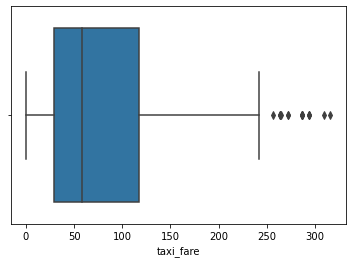

In [24]:
sns.boxplot(x=df1['taxi_fare'])
plt.show()

In [25]:
df1.shape

(479, 6)

## Feature Scaling

In [26]:
df1.dtypes

From                 object
To                   object
km                    int32
fuel_price          float64
fuel_consumption    float64
taxi_fare             int32
dtype: object

In [27]:
numeric_columns = ['km','fuel_price','fuel_consumption','taxi_fare']
numeric_df = df1[numeric_columns]

numeric_df.head()

km  fuel_price  fuel_consumption  taxi_fare
0  13       92.01              1.04         96
1  16       92.01              1.28        118
2  21       92.01              1.68        155
3  23       92.01              1.84        169
4  25       92.01              2.00        184

In [28]:
numeric_df.isna().sum()

km                  0
fuel_price          0
fuel_consumption    0
taxi_fare           0
dtype: int64

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
numeric = scaler.fit_transform(numeric_df)

In [30]:
#df after scaling
transformdf = pd.DataFrame(data=numeric,columns = numeric_columns)
transformdf.head()

km  fuel_price  fuel_consumption  taxi_fare
0  0.302326         0.0          0.232143   0.303797
1  0.372093         0.0          0.285714   0.373418
2  0.488372         0.0          0.375000   0.490506
3  0.534884         0.0          0.410714   0.534810
4  0.581395         0.0          0.446429   0.582278

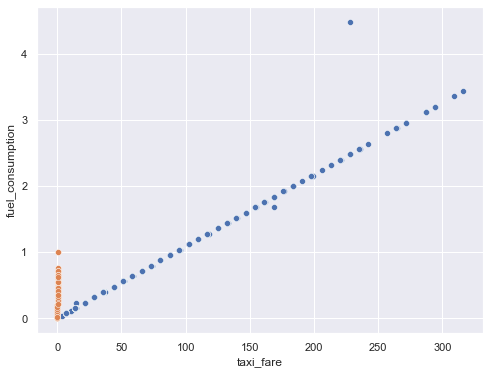

In [31]:
sns.set(rc={'figure.figsize':(8,6)})

sns.scatterplot(data=df1,x='taxi_fare',y='fuel_consumption')
sns.scatterplot(data = transformdf,x='taxi_fare',y='fuel_consumption')
plt.show()

## Encoding Categorical variables

In [32]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
df1['From'] = le.fit_transform(df1.From)
df1.head()

C:\Users\GYELTS~1\AppData\Local\Temp/ipykernel_7336/1569088270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['From'] = le.fit_transform(df1.From)


From                To  km  fuel_price  fuel_consumption  taxi_fare
0     9  Marung ( mining)  13       92.01              1.04         96
1     9            Kerung  16       92.01              1.28        118
2     9      Chhokhorling  21       92.01              1.68        155
3     9        Dechheling  23       92.01              1.84        169
4     9         Norbugang  25       92.01              2.00        184

In [33]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
df1['To'] = le.fit_transform(df1.From)
df1.head()

C:\Users\GYELTS~1\AppData\Local\Temp/ipykernel_7336/1550849084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['To'] = le.fit_transform(df1.From)


From  To  km  fuel_price  fuel_consumption  taxi_fare
0     9   9  13       92.01              1.04         96
1     9   9  16       92.01              1.28        118
2     9   9  21       92.01              1.68        155
3     9   9  23       92.01              1.84        169
4     9   9  25       92.01              2.00        184

In [34]:
df1.tail()

From  To  km  fuel_price  fuel_consumption  taxi_fare
529     2   2  10       92.01              0.80         73
530     2   2  12       92.01              0.96         88
531     2   2  18       92.01              1.44        132
532     2   2  20       92.01              1.60        147
533     4   4   1       92.01              0.08          7

## Feature Selection

Text(0, 0.5, 'taxi_fare')

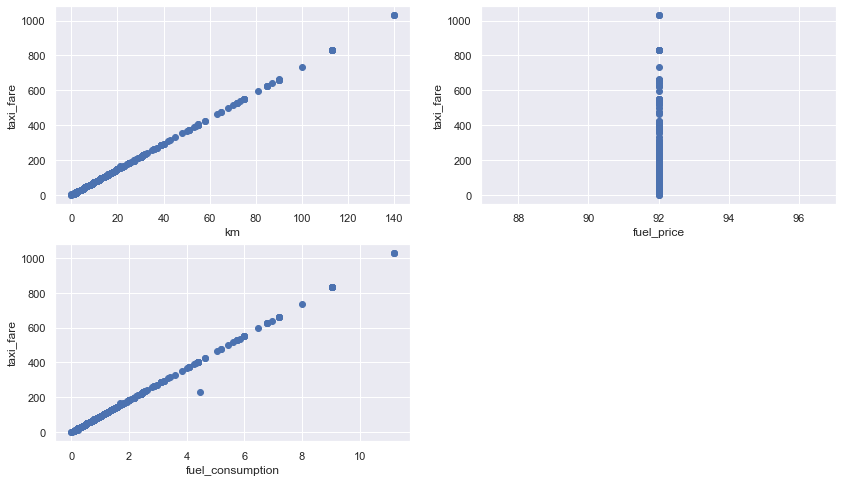

In [35]:
plt.figure(figsize=(14, 8))


plt.subplot(2, 2, 1)
plt.scatter(x=df["km"], y=df["taxi_fare"])
plt.xlabel("km")
plt.ylabel("taxi_fare")

plt.subplot(2, 2, 2)
plt.scatter(x=df["fuel_price"], y=df["taxi_fare"])
plt.xlabel("fuel_price")
plt.ylabel("taxi_fare")

plt.subplot(2, 2, 3)
plt.scatter(x=df["fuel_consumption"], y=df["taxi_fare"])
plt.xlabel("fuel_consumption")
plt.ylabel("taxi_fare")




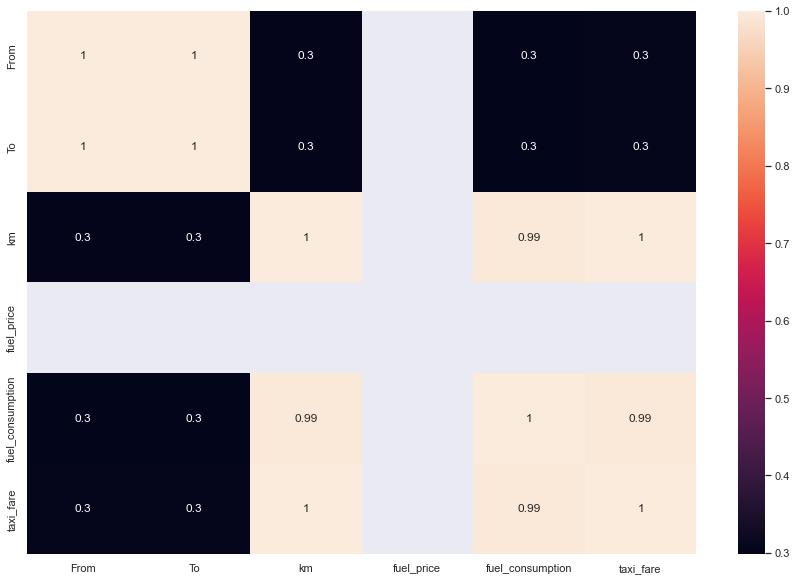

In [36]:
corr = df1.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

In [37]:
df1.corr()['taxi_fare'].sort_values()

From                0.303885
To                  0.303885
fuel_consumption    0.993047
km                  0.999930
taxi_fare           1.000000
fuel_price               NaN
Name: taxi_fare, dtype: float64

## Model Training

In [38]:
#separate data into X features and Y target
X = df1.drop(columns=["taxi_fare"])
Y = df1["taxi_fare"]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 5)

## Random Forest

In [40]:
import sklearn
sklearn.__version__

'1.0.2'

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [42]:
#fitting a model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [43]:
# make prediction
y_pred = rf.predict(X_test)

In [44]:
#calculating R-squared
from sklearn.metrics import r2_score
forest_r2 = r2_score(y_test, y_pred)

print("Random Forest R-squared: {}".format(forest_r2))

Random Forest R-squared: 0.9994313882841748


In [45]:
# calculate root mean squared error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error

forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))

Random Forest Regression RMSE: 1.8484854136011435


## score checking

In [46]:
rf.score(X_train, y_train)

0.9998186031827716

In [47]:
rf.score(X_test, y_test)

0.9994313882841748

In [48]:
df1.tail()

From  To  km  fuel_price  fuel_consumption  taxi_fare
529     2   2  10       92.01              0.80         73
530     2   2  12       92.01              0.96         88
531     2   2  18       92.01              1.44        132
532     2   2  20       92.01              1.60        147
533     4   4   1       92.01              0.08          7

In [49]:
arg = ["From","To","km","fuel_price", "fuel_consumption"]

In [50]:
y = np.array([2,2,30,92.01,2.4])
np = y.reshape(-1,5)
rf.predict(np)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([220.33])

**KNN**

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knnr = KNeighborsRegressor(n_neighbors=6)
knnr.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=6)

In [52]:
y_pred = knnr.predict(X_test) 

In [53]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(X)

In [54]:
knnrg = KNeighborsRegressor(n_neighbors = 6)
knnrg.fit(X_train,y_train)
y_pred = knnrg.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
MSE

52.57847222222219

In [55]:
#calculating R-squared
from sklearn.metrics import r2_score
knnrg_r2 = r2_score(y_test, y_pred)
print("Knn R-squared: {}".format(knnrg_r2))

Knn R-squared: 0.9912503292552886


In [56]:
# calculate root mean squared error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error

knn_mse = mean_squared_error(y_pred, y_test)
knn_rmse = np.sqrt(knn_mse)
print("knn RMSE: {}".format(knn_rmse))

knn RMSE: 7.251101448898794


In [57]:
MSEtr = []
MSEte = []
for k in range(1,50):
  knn =  KNeighborsRegressor(n_neighbors = k)
  knn.fit(X_train,y_train)
  y_pred_train = knn.predict(X_train)
  y_pred_test = knn.predict(X_test)
  MSE1 = mean_squared_error(y_train,y_pred_train)
  MSEtr.append(MSE1)
  MSE2 = mean_squared_error(y_test,y_pred_test)
  MSEte.append(MSE2)

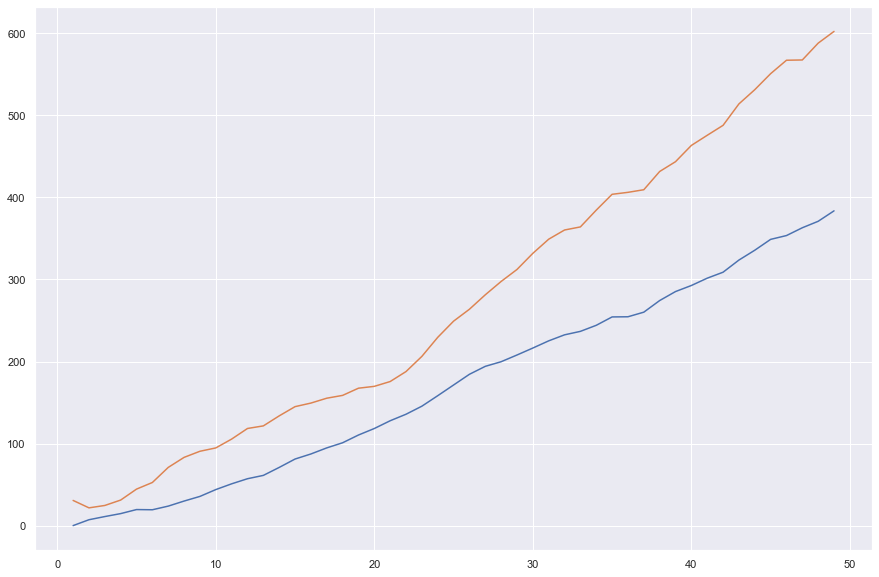

In [58]:
plt.plot(np.arange(1,50),MSEtr)
plt.plot(np.arange(1,50),MSEte)
plt.show()

In [59]:
#Choosing the best k
trainscore = []
testscore = []
for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn.score(X_train,y_train)
    knn.score(X_test,y_test)
    trainscore.append(knn.score(X_train, y_train))
    testscore.append(knn.score(X_test, y_test))

In [60]:
x=np.arange(1,50)

In [61]:
knn.score(X_train, y_train)

0.9153438461265437

In [62]:
knn.score(X_test, y_test)

0.8997809850764045

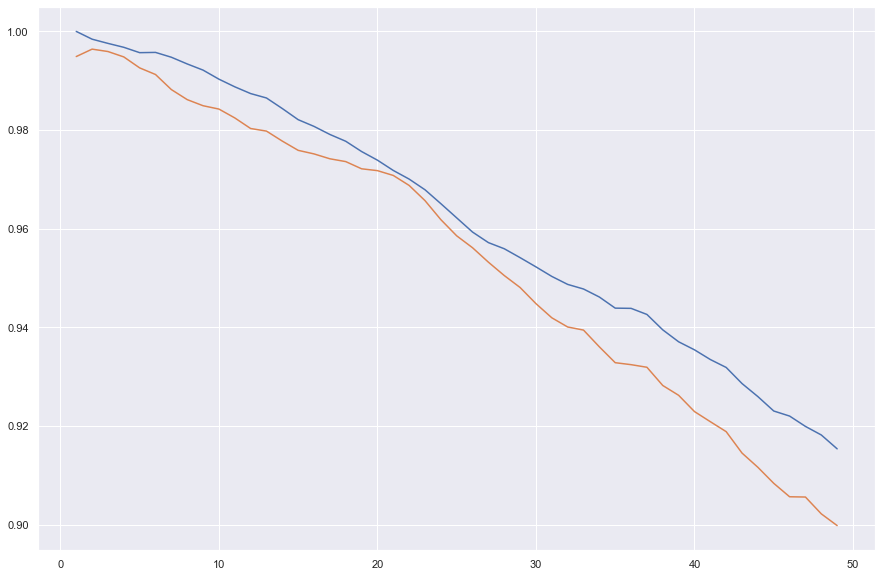

In [63]:
plt.plot(x, trainscore)
plt.plot(x, testscore)
plt.show()

In [64]:
df1.tail()

From  To  km  fuel_price  fuel_consumption  taxi_fare
529     2   2  10       92.01              0.80         73
530     2   2  12       92.01              0.96         88
531     2   2  18       92.01              1.44        132
532     2   2  20       92.01              1.60        147
533     4   4   1       92.01              0.08          7

In [65]:
arg = ["From","To","km","fuel_price", "fuel_consumption"]

In [66]:
y = np.array([2,2,30,92.01,2.4])
np = y.reshape(-1,5)
knn.predict(np)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([173.79591837])

## Multiple Regression

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [68]:
#calculating R-squared
from sklearn.metrics import r2_score
multir_r2 = r2_score(y_test, y_pred)

print("Multiple Regression R-squared: {}".format(multir_r2))

Multiple Regression R-squared: 0.9912503292552886


In [69]:
# calculate root mean squared error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error

multi_mse = mean_squared_error(y_pred, y_test)
multi_rmse = np.sqrt(multi_mse)
print("Multiple Regression RMSE: {}".format(multi_rmse))

Multiple Regression RMSE: 7.251101448898794


In [70]:
regressor.score(X_train,y_train)

0.9998204173113725

In [71]:
regressor.score(X_test,y_test)

0.9999496985216437

In [72]:
import numpy as numpy
y = numpy.array([2,2,30,92.01,2.4])
mp = y.reshape(-1,len(arg))
ypredict = regressor.predict(mp)
ypredict

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([220.54761358])

## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion="entropy")
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [74]:
# calculate root mean squared error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error

decision_mse = mean_squared_error(y_pred, y_test)
decision_rmse = np.sqrt(decision_mse)
print("Decision Tree RMSE: {}".format(decision_rmse))

Decision Tree RMSE: 7.251101448898794


In [75]:
#calculating R-squared
from sklearn.metrics import r2_score
decision_r2 = r2_score(y_test, y_pred)

print("Decision Tree R-squared: {}".format(decision_r2))

Decision Tree R-squared: 0.9912503292552886


In [76]:
dtmodel.score(X_train,y_train)

0.9498607242339833

In [77]:
dtmodel.score(X_test,y_test)

0.775

[Text(0.3047794117647059, 0.95, 'X[2] <= 7.5\nentropy = 5.011\nsamples = 359\nvalue = [2, 10, 2, 19, 4, 40, 30, 17, 8, 22, 16, 5, 16\n3, 11, 14, 3, 5, 10, 7, 5, 10, 7, 7, 2, 9, 4\n3, 4, 1, 16, 2, 1, 3, 1, 5, 5, 1, 2, 1, 1\n2, 1, 7, 2, 1, 1, 2, 1, 2, 3, 2, 1]'),
 Text(0.11176470588235295, 0.85, 'X[2] <= 3.5\nentropy = 3.147\nsamples = 175\nvalue = [2, 10, 2, 19, 4, 40, 30, 17, 8, 22, 16, 5, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.07058823529411765, 0.75, 'X[2] <= 2.5\nentropy = 1.867\nsamples = 77\nvalue = [2, 10, 2, 19, 4, 40, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.058823529411764705, 0.65, 'X[4] <= 0.14\nentropy = 1.806\nsamples = 37\nvalue = [2, 10, 2, 19, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 

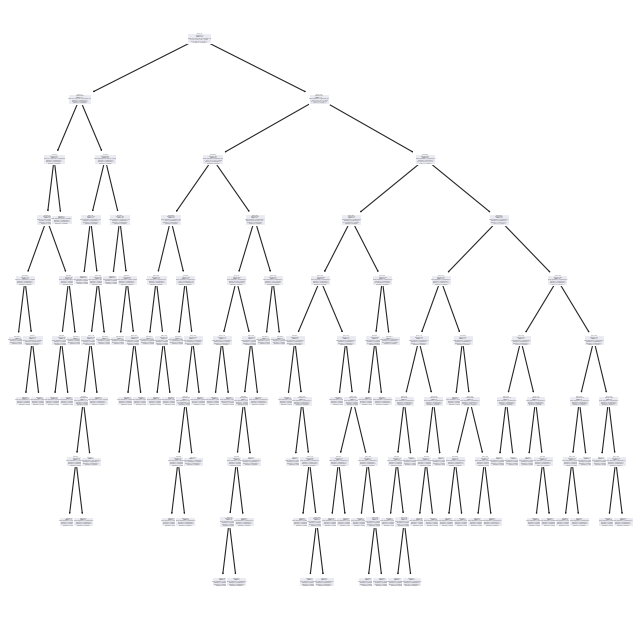

In [78]:
from sklearn import tree
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
tree.plot_tree(dtmodel)

In [79]:
ypred = dtmodel.predict(X_test)


In [80]:
import numpy as numpy
y = numpy.array([2,2,30,92.01,2.4])
mp = y.reshape(-1,len(arg))
ypredict = dtmodel.predict(mp)
ypredict

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([220])

In [81]:
# combine all models' results into one dataframe
data = {"Model": ["Multiple Regression", "Random Forest","KNN","Decision Tree"], 
        "R-squared": [multir_r2, forest_r2,knnrg_r2,decision_r2],           
        "RMSE": [multi_rmse, forest_rmse,knn_rmse, decision_rmse]}

results = pd.DataFrame(data=data)
results

Model  R-squared      RMSE
0  Multiple Regression   0.991250  7.251101
1        Random Forest   0.999431  1.848485
2                  KNN   0.991250  7.251101
3        Decision Tree   0.991250  7.251101

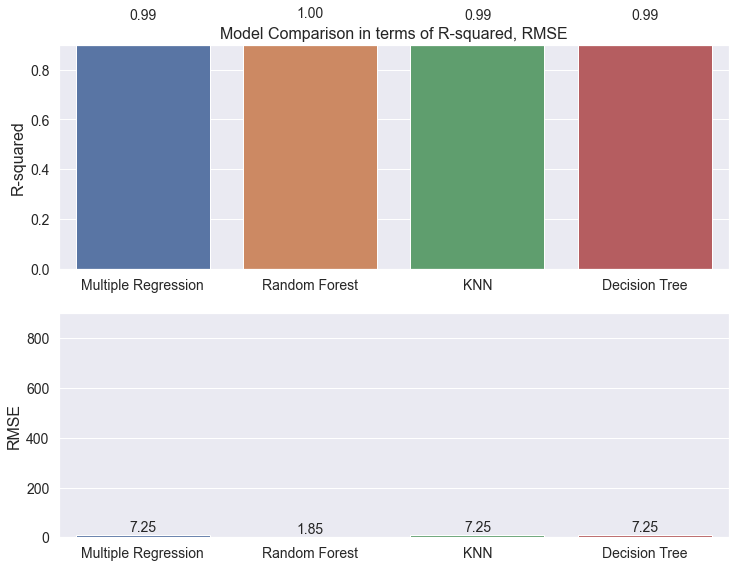

In [82]:
# visualize the results using bar charts

plt.rcParams["axes.labelsize"] = 16
plt.figure(figsize=(12, 14))

plt.subplot(3, 1, 1)
plt.title("Model Comparison in terms of R-squared, RMSE", fontsize=16)
g1 = sns.barplot(x="Model", y="R-squared", data=results)
plt.ylim(0, 0.9)
g1.set_xlabel("")
g1.tick_params(labelsize=14)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

plt.subplot(3, 1, 2)
g2 = sns.barplot(x="Model", y="RMSE", data=results)
plt.ylim(0, 900)
g2.set_xlabel("")
g2.tick_params(labelsize=14)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+15, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.savefig("taxi_fare.png")

We loaded the data and did the necessary cleaning and data pre processing first. After data preprocessing, we used four different algorithms to model the data, random forest, KNN, Multiple Regression and Decision Tree. Each algorithm presented different results. R-Squared of Multiple Regression is 0.99 and RMSE is 7.25. R-Squared of Random Forest is 1.00 and RMSE is 1.85. R-Squared of KNN is 0.99 and RMSE is 7.25. R-Squared of Decision Tree is 0.99 and RMSE 7.25. Since the RMSE of random forest is low compared to other algorithms, we decided to use random forest as our algorithm.

## THANK YOU